# Find prognostic significant genes between recurrence and non-reucrrence patients

In [5]:
import os
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu,ttest_ind

In [ ]:
feature_path='./03-results/14-GMM-features/'
import json
sig_gene_path='./01-raw-pValue-005.npy'
sig_genes=np.load(sig_gene_path,allow_pickle=True)
feature_lst=['global_mean','global_std','skewness','kurtosis','high_ratio','boundary_ratio','entropy','kde_max','kde_min','kde_entropy','kde_skewness','kde_kurtosis']
column_lst=[i+'_'+j for i in sig_genes for j in feature_lst]
data=[]
slide_lst=[]
for slide in os.listdir(feature_path):
    slide_dict={}
    slide_lst.append(slide)
    for gene in sig_genes:
        with open(os.path.join(feature_path,slide,gene+'.json'),'r') as f:
            tmp=json.load(f)
        for k,v in tmp.items():
            slide_dict[gene+'_'+k]=v
    data.append(slide_dict)
feature_df=pd.DataFrame(data,columns=column_lst,index=slide_lst)
feature_df

FileNotFoundError: [Errno 2] No such file or directory: '/2data/liyixin/03-PPS与空间基因相关性分析/03-results/01-352个slides上通过p值计算出的高预测性基因/01-raw-pValue-005.npy'

In [ ]:
# feature_df.to_csv('/2data/liyixin/03-PPS与空间基因相关性分析/03-results/15-GMM后整理的差异基因/01-spatial_feature.csv')

In [ ]:
for i in spatial_fea.columns:
    spatial_fea[i]=(spatial_fea[i]-spatial_fea[i].min())/(spatial_fea[i].max()-spatial_fea[i].min())
clinical_df=pd.read_csv('./01-data/10-clinical-info/04-patients.csv',index_col=0)
recurrence_patients=clinical_df[clinical_df['recurrence']=='YES'].index
non_recurrence_patients=clinical_df[clinical_df['recurrence']=='NO'].index
recurrence_df=spatial_fea.loc[recurrence_patients]
non_recurrence_df=spatial_fea.loc[non_recurrence_patients]
p_dict={}
for fea in spatial_fea.columns:
    _,p=ttest_ind(recurrence_df[fea],non_recurrence_df[fea])
    p_dict[fea]=p
sig_fea=[{k:v} for k,v in p_dict.items()  if v<0.01]
sig_fea

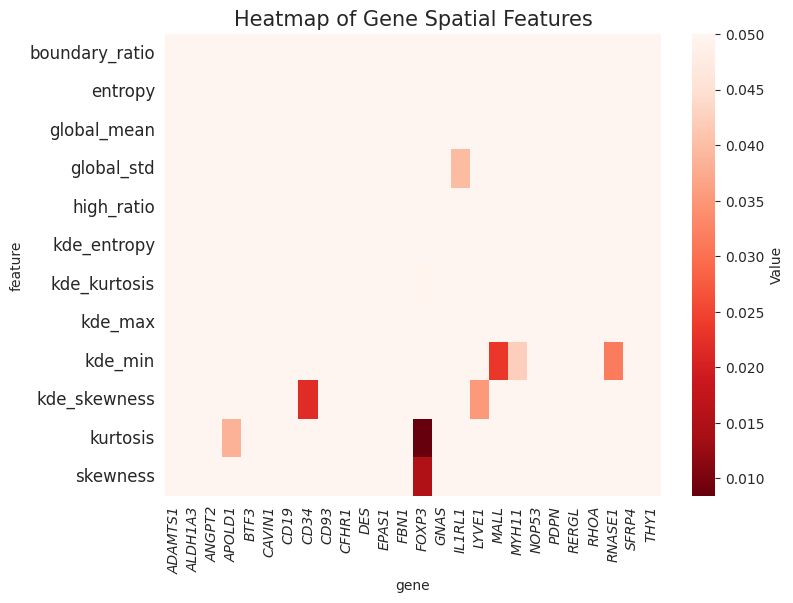

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
parsed = []
for key, value in p_dict.items():
    gene, feature = key.split('_', 1)
    parsed.append({'gene': gene, 'feature': feature, 'value': value})
df = pd.DataFrame(parsed)
heatmap_data = df.pivot(index='feature', columns='gene', values='value')
heatmap_data = heatmap_data.sort_index()        
heatmap_data = heatmap_data.sort_index(axis=1)    

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=False, cmap='Reds_r', cbar_kws={'label': 'Value'}, vmax=0.05)
plt.xticks(fontsize=10, fontstyle='italic') 
plt.yticks(fontsize=12)
plt.title("Heatmap of Gene Spatial Features", fontsize=15)
plt.show()


In [ ]:
sns_df=pd.DataFrame(columns=['slide_name','fea','value','recurrence'])
data=[]
for sin in recurrence_patients:
    for fea in sig_fea:
        fea_value=list(spatial_fea.loc[sin,fea.keys()].values)[0]
        data.append({'slide_name':sin,
                     'fea':list(fea.keys())[0],
                     'value':fea_value,
                     'recurrence':'YES'})
for sin in non_recurrence_patients:
    for fea in sig_fea:
        fea_value=list(spatial_fea.loc[sin,fea.keys()].values)[0]
        data.append({'slide_name':sin,
                     'fea':list(fea.keys())[0],
                     'value':fea_value,
                     'recurrence':'NO'})
sns_df=pd.DataFrame(data,columns=['slide_name','fea','value','recurrence'])
sns_df

,slide_name,fea,value,recurrence
0,TCGA-RC-A7SH-01Z-00-DX1,FOXP3_kurtosis,0.151745,YES
1,TCGA-UB-A7MB-01Z-00-DX1,FOXP3_kurtosis,0.134089,YES
2,TCGA-NI-A4U2-01Z-00-DX1,FOXP3_kurtosis,0.195258,YES
3,TCGA-WX-AA44-01Z-00-DX1,FOXP3_kurtosis,0.015029,YES
4,TCGA-DD-A4NS-01Z-00-DX1,FOXP3_kurtosis,0.305097,YES
...,...,...,...,...
197,TCGA-GJ-A3OU-01Z-00-DX1,FOXP3_kurtosis,0.060993,NO
198,TCGA-DD-AAD2-01Z-00-DX1,FOXP3_kurtosis,0.166842,NO
199,TCGA-G3-AAV3-01Z-00-DX1,FOXP3_kurtosis,0.126107,NO
200,TCGA-G3-A5SM-01Z-00-DX1,FOXP3_kurtosis,0.268550,NO


/tmp/ipykernel_57087/3455459411.py:30: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(


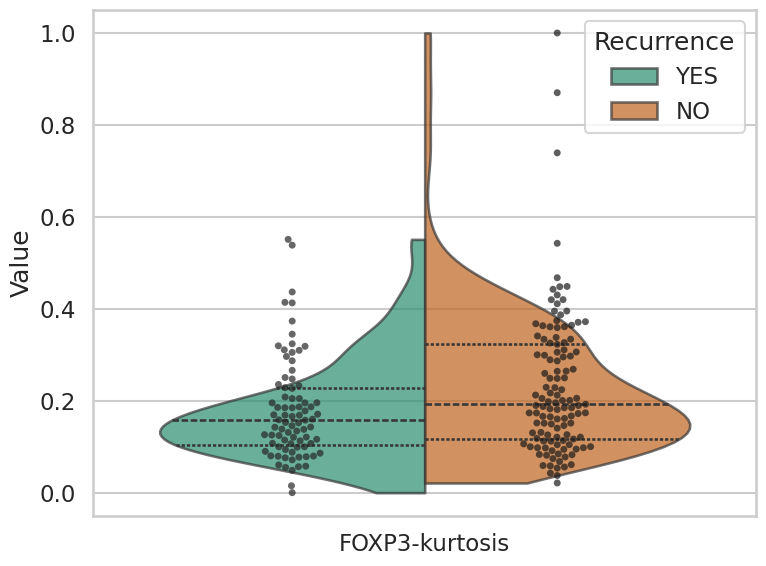

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")
sns_df = sns_df[sns_df['fea'] == 'FOXP3_kurtosis']
plt.figure(figsize=(8, 6))
palette = sns.color_palette(["#1b9e77", "#d95f02"], desat=1)

ax = sns.violinplot(
    x='fea', 
    y='value', 
    data=sns_df, 
    hue='recurrence', 
    palette=palette, 
    split=True, 
    inner="quartile", 
    cut=0,
    alpha=0.7
)

sns.swarmplot(
    x='fea', 
    y='value', 
    data=sns_df, 
    hue='recurrence', 
    dodge=True, 
    color='k', 
    alpha=0.7
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], title='Recurrence')
plt.xlabel("")
plt.ylabel("Value")
# plt.title("Violin Plot of FOXP3-kurtosis by Recurrence")
plt.xticks(ticks=[0], labels=["FOXP3-kurtosis"], rotation=0, ha='center')
plt.tight_layout()
plt.show()